# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'data' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):     
    print(image_class)                         
    for image in os.listdir(os.path.join(data_dir, image_class)):       
        image_path = os.path.join(data_dir, image_class, image)
        print(image_path)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            print(tip)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

detected
data\detected\Y1.jpg
jpeg
data\detected\Y10.jpg
jpeg
data\detected\Y100.JPG
jpeg
data\detected\Y101.jpg
jpeg
data\detected\Y102.jpg
jpeg
data\detected\Y103.jpg
jpeg
data\detected\Y104.jpg
jpeg
data\detected\Y105.jpg
jpeg
data\detected\Y106.jpg
jpeg
data\detected\Y107.jpg
jpeg
data\detected\Y108.jpg
jpeg
data\detected\Y109.JPG
jpeg
data\detected\Y11.jpg
jpeg
data\detected\Y111.JPG
jpeg
data\detected\Y112.JPG
jpeg
data\detected\Y113.JPG
jpeg
data\detected\Y114.JPG
jpeg
data\detected\Y115.JPG
jpeg
data\detected\Y116.JPG
jpeg
data\detected\Y117.JPG
jpeg
data\detected\Y12.jpg
jpeg
data\detected\Y120.JPG
jpeg
data\detected\Y13.jpg
jpeg
data\detected\Y14.jpg
jpeg
data\detected\Y146.JPG
jpeg
data\detected\Y147.JPG
jpeg
data\detected\Y148.JPG
jpeg
data\detected\Y15.jpg
jpeg
data\detected\Y153.jpg
jpeg
data\detected\Y154.jpg
jpeg
data\detected\Y155.JPG
jpeg
data\detected\Y156.JPG
jpeg
data\detected\Y157.JPG
jpeg
data\detected\Y158.JPG
jpeg
data\detected\Y159.JPG
jpeg
data\detected\Y16.J

# 3. Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 250 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

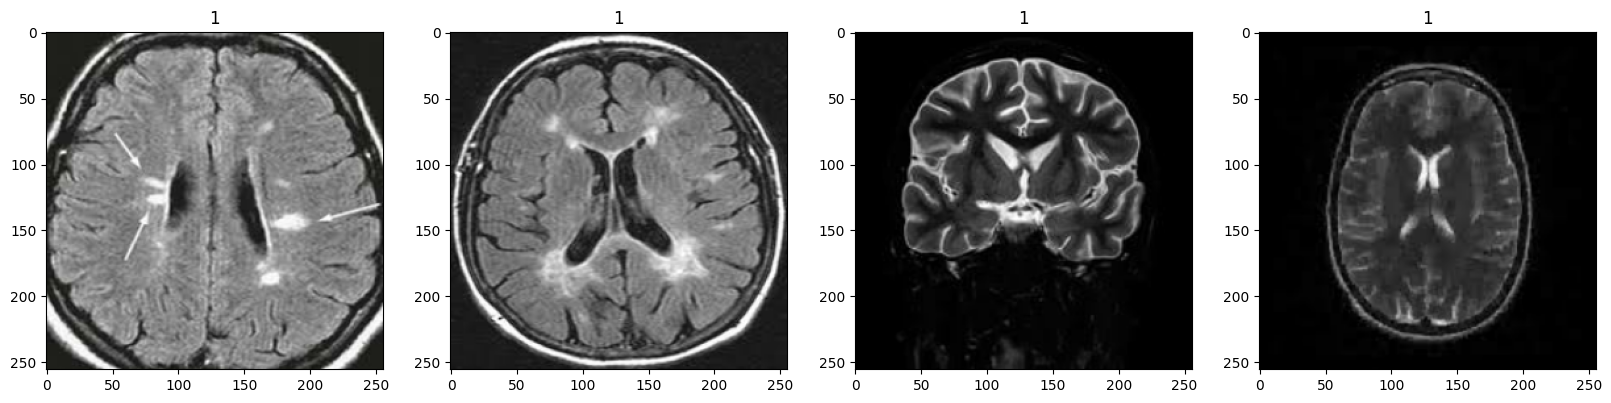

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.9998391 , 0.9998391 , 0.9998391 ],
          [0.9825654 , 0.9825654 , 0.9825654 ],
          [0.97730607, 0.97730607, 0.97730607],
          ...,
          [0.99991655, 0.99991655, 0.99991655],
          [0.9998955 , 0.9998955 , 0.9998955 ],
          [0.99995404, 0.99995404, 0.99995404]],
 
         [[0.97241116, 0.97241116, 0.97241116],
          [0.9899775 , 0.9899775 , 0.9899775 ],
          [0.9967425 , 0.9967425 , 0.9967425 ],
          ...,
          [0.9851497 , 0.9851497 , 0.9851497 ],
          [0.9818557 , 0.9818557 , 0.9818557 ],
          [0.992019  , 0.992019  , 0.992019  ]],
 
         [[0.96482074, 0.96482074, 0.96482074],
          [0.9871469 , 0.9871469 , 0.9871469 ],
          [0.9871904 , 0.9871904 , 0.9871904 ],
          ...,
          [0.9526093 , 0.9526093 , 0.9526093 ],
          [0.9651635 , 0.9651635 , 0.9651635 ],
          [0.9847733 , 0.9847733 , 0.9847733 ]],
 
         ...,
 
         [[0.98743105, 0.98743105, 0.98743105],
          [0.98662

# 5. Split Data

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train_size

5

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [16]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\tushar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4484 - loss: 0.9203 - val_accuracy: 0.6875 - val_loss: 0.6290
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 786ms/step - accuracy: 0.7480 - loss: 0.6099 - val_accuracy: 0.8438 - val_loss: 0.4666
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7990 - loss: 0.4923 - val_accuracy: 0.6875 - val_loss: 0.5017
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 746ms/step - accuracy: 0.7491 - loss: 0.5342 - val_accuracy: 0.8750 - val_loss: 0.3065
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 726ms/step - accuracy: 0.7939 - loss: 0.4638 - val_accuracy: 0.8438 - val_loss: 0.3827
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 641ms/step - accuracy: 0.8657 - loss: 0.4296 - val_accuracy: 0.8438 - val_loss: 0.3926
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step - accuracy: 0.8720 - loss: 0.3470 - val_accuracy: 0.8125 - val_loss: 0.4034
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 698ms/step - accuracy: 0.9091 - loss: 0.2471 - val_accuracy: 0.9062 - val_loss: 0.29

# 8. Plot Performance

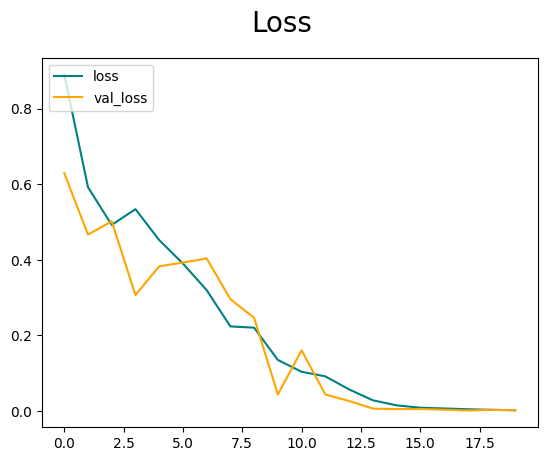

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

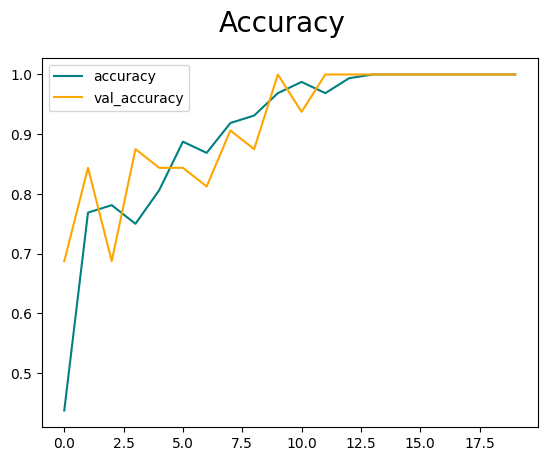

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [43]:
import cv2

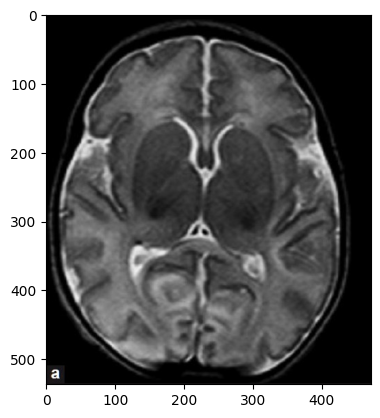

In [48]:
img = cv2.imread('data/not_detected/No12.JPG')
plt.imshow(img)
plt.show()

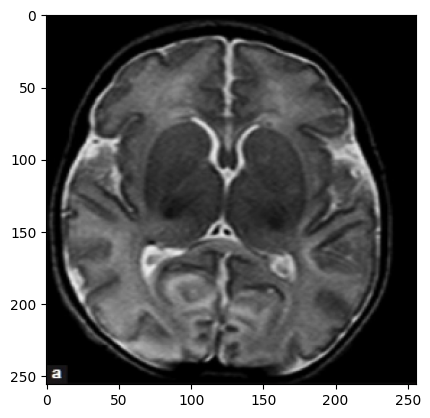

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [51]:
yhat

array([[0.99981564]], dtype=float32)

In [52]:
if yhat > 0.5: 
    print(f'Brain Tumor Not Detected')
else:
    print(f'Brain Tumor Detected')

Brain Tumor Not Detected


# 11. Save the Model

In [37]:
from tensorflow.keras.models import load_model

In [38]:
model.save(os.path.join('models','brain_tumor.h5'))

In [39]:
new_model = load_model('models/brain_tumor.h5')

In [40]:
pred = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


In [41]:
pred

array([[2.2298061e-06]], dtype=float32)